## Gráficos de Análise Exploratória de Dados (EDA) - Boxplot GAS/GAS LIMIT

## Packages and libraries

In [1]:
pip install google-cloud-bigquery db-dtypes pandas tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importar pacotes
import os
import requests
import numpy as np
import glob
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

from tensorflow import keras
from tensorflow.keras import layers, models

## Conjunto de Dados - Data Sets (NFT's Blue Chip's e NFT's Comuns)

Arquivos CSV criados a partir da extração de dados no Google BigQuery contém as seguintes informações:

* BLOCK_TIMESTAMP: timestamp do bloco em que a transferência foi registrada.
* FROM_ADDRESS: endereço da carteira que enviou os tokens.
* TO_ADDRESS: endereço da carteira que recebeu os tokens.
* VALUE: valor da transferência em wei, a menor unidade de ether (a criptomoeda da Ethereum).
* TRANSACTION_HASH: hash da transação na blockchain Ethereum.
* NONCE: número de sequência da transação na carteira que a criou.
* FROM_ADDRESS_BLOCKCHAIN: endereço da carteira que enviou a transação na blockchain Ethereum.
* TO_ADDRESS_BLOCKCHAIN: endereço da carteira que recebeu a transação na blockchain Ethereum.
* GAS: quantidade de gas (unidade de custo de processamento na Ethereum) usada pela transação.
* RECEIPT_GAS_USED: quantidade de gas usada para executar a transferência de tokens.

In [3]:
def lista_df():
  # Lista vazia para armazenar os dataframes
  df_list = []

  # Localizar todos os arquivos CSV no diretório atual
  for filename in glob.glob("Z:/Python/Data/Blue_Chips/*.csv"):
      # Ler o arquivo CSV em um dataframe
      df = pd.read_csv(filename)
      # Adicionar o dataframe à lista
      df_list.append(df)

  return df_list

In [4]:
def lista_comum_df():
  # lista vazia para armazenar os dataframes
  df_comum_list = []

  # Localizar todos os arquivos CSV no diretório atual
  for filename in glob.glob("Z:/Python/Data/Comuns/Teste3/*.csv"):

      # Ler o arquivo CSV em um dataframe
      df = pd.read_csv(filename)
      # Adicionar o dataframe à lista
      df_comum_list.append(df)

  return df_comum_list

In [5]:
def process_dataframe(df):
    # Convertendo a coluna 'BLOCK_TIMESTAMP' e 'BLOCK_TIMESTAMP_BLUE' para o tipo datetime
    df['BLOCK_TIMESTAMP'] = pd.to_datetime(df['BLOCK_TIMESTAMP'])

    # Criando uma nova coluna com a data (sem o horário) dos blocos
    df['BLOCK_DATE'] = df['BLOCK_TIMESTAMP'].dt.date

    # Convertendo a coluna 'BLOCK_DATE' para o tipo datetime
    df['BLOCK_DATE'] = pd.to_datetime(df['BLOCK_DATE'])

In [6]:
list_df_blue = []
list_df_blue = lista_df()
len(list_df_blue)

20

In [7]:
list_df_comum = []
list_df_comum = lista_comum_df()
len(list_df_comum)

23

In [8]:
# Loop para iterar sobre as list_df_blue, list_df_comum
for idx, df_group in enumerate([list_df_blue, list_df_comum]):
    if idx == 0:
        group_label = "Blue Chip"
    else:
        group_label = "Comum"

    for i, df_aux in enumerate(df_group):
        print(f"\nData Frame {group_label} {i+1}")
        print("Informações:")
        df_aux.info()
        print("\n5 primeiros registros:")
        print(df_aux.head())



Data Frame Blue Chip 1
Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98206 entries, 0 to 98205
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ADDRESS_BLUE             98206 non-null  object
 1   BLOCK_TIMESTAMP_BLUE     98206 non-null  object
 2   BLOCK_TIMESTAMP          98206 non-null  object
 3   FROM_ADDRESS             98206 non-null  object
 4   TO_ADDRESS               98206 non-null  object
 5   VALUE                    98206 non-null  int64 
 6   TRANSACTION_HASH         98206 non-null  object
 7   NONCE                    98206 non-null  int64 
 8   FROM_ADDRESS_BLOCKCHAIN  98206 non-null  object
 9   TO_ADDRESS_BLOCKCHAIN    98206 non-null  object
 10  GAS                      98206 non-null  int64 
 11  RECEIPT_GAS_USED         98206 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 9.0+ MB

5 primeiros registros:
                                 ADDRE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21100 entries, 0 to 21099
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ADDRESS_BLUE             21100 non-null  object
 1   BLOCK_TIMESTAMP_BLUE     21100 non-null  object
 2   BLOCK_TIMESTAMP          21100 non-null  object
 3   FROM_ADDRESS             21100 non-null  object
 4   TO_ADDRESS               21100 non-null  object
 5   VALUE                    21100 non-null  int64 
 6   TRANSACTION_HASH         21100 non-null  object
 7   NONCE                    21100 non-null  int64 
 8   FROM_ADDRESS_BLOCKCHAIN  21100 non-null  object
 9   TO_ADDRESS_BLOCKCHAIN    21100 non-null  object
 10  GAS                      21100 non-null  int64 
 11  RECEIPT_GAS_USED         21100 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.9+ MB

5 primeiros registros:
                                 ADDRESS_BLUE     BLOCK_TIMESTAMP_BLUE  \
0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79513 entries, 0 to 79512
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ADDRESS_BLUE             79513 non-null  object
 1   BLOCK_TIMESTAMP_BLUE     79513 non-null  object
 2   BLOCK_TIMESTAMP          79513 non-null  object
 3   FROM_ADDRESS             79513 non-null  object
 4   TO_ADDRESS               79513 non-null  object
 5   VALUE                    79513 non-null  int64 
 6   TRANSACTION_HASH         79513 non-null  object
 7   NONCE                    79513 non-null  int64 
 8   FROM_ADDRESS_BLOCKCHAIN  79513 non-null  object
 9   TO_ADDRESS_BLOCKCHAIN    79509 non-null  object
 10  GAS                      79513 non-null  int64 
 11  RECEIPT_GAS_USED         79513 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 7.3+ MB

5 primeiros registros:
                                 ADDRESS_BLUE     BLOCK_TIMESTAMP_BLUE  \
0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210339 entries, 0 to 210338
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ADDRESS_BLUE             210339 non-null  object
 1   BLOCK_TIMESTAMP_BLUE     210339 non-null  object
 2   BLOCK_TIMESTAMP          210339 non-null  object
 3   FROM_ADDRESS             210339 non-null  object
 4   TO_ADDRESS               210339 non-null  object
 5   VALUE                    210339 non-null  int64 
 6   TRANSACTION_HASH         210339 non-null  object
 7   NONCE                    210339 non-null  int64 
 8   FROM_ADDRESS_BLOCKCHAIN  210339 non-null  object
 9   TO_ADDRESS_BLOCKCHAIN    210339 non-null  object
 10  GAS                      210339 non-null  int64 
 11  RECEIPT_GAS_USED         210339 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 19.3+ MB

5 primeiros registros:
                                 ADDRESS_BLUE     BLOCK_TI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52072 entries, 0 to 52071
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ADDRESS_BLUE             52072 non-null  object
 1   BLOCK_TIMESTAMP_BLUE     52072 non-null  object
 2   BLOCK_TIMESTAMP          52072 non-null  object
 3   FROM_ADDRESS             52072 non-null  object
 4   TO_ADDRESS               52072 non-null  object
 5   VALUE                    52072 non-null  int64 
 6   TRANSACTION_HASH         52072 non-null  object
 7   NONCE                    52072 non-null  int64 
 8   FROM_ADDRESS_BLOCKCHAIN  52072 non-null  object
 9   TO_ADDRESS_BLOCKCHAIN    52072 non-null  object
 10  GAS                      52072 non-null  int64 
 11  RECEIPT_GAS_USED         52072 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.8+ MB

5 primeiros registros:
                                 ADDRESS_BLUE     BLOCK_TIMESTAMP_BLUE  \
0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18044 entries, 0 to 18043
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   BLOCK_TIMESTAMP          18044 non-null  object
 1   FROM_ADDRESS             18044 non-null  object
 2   TO_ADDRESS               18044 non-null  object
 3   VALUE                    18044 non-null  int64 
 4   TRANSACTION_HASH         18044 non-null  object
 5   NONCE                    18044 non-null  int64 
 6   FROM_ADDRESS_BLOCKCHAIN  18044 non-null  object
 7   TO_ADDRESS_BLOCKCHAIN    18044 non-null  object
 8   GAS                      18044 non-null  int64 
 9   RECEIPT_GAS_USED         18044 non-null  int64 
 10  ADDRESS_COMUM            18044 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.5+ MB

5 primeiros registros:
                  BLOCK_TIMESTAMP                                FROM_ADDRESS  \
0  2023-03-07 19:50:59.000000 UTC  0x0000000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36174 entries, 0 to 36173
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   BLOCK_TIMESTAMP          36174 non-null  object
 1   FROM_ADDRESS             36174 non-null  object
 2   TO_ADDRESS               36174 non-null  object
 3   VALUE                    36174 non-null  int64 
 4   TRANSACTION_HASH         36174 non-null  object
 5   NONCE                    36174 non-null  int64 
 6   FROM_ADDRESS_BLOCKCHAIN  36174 non-null  object
 7   TO_ADDRESS_BLOCKCHAIN    36174 non-null  object
 8   GAS                      36174 non-null  int64 
 9   RECEIPT_GAS_USED         36174 non-null  int64 
 10  ADDRESS_COMUM            36174 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.0+ MB

5 primeiros registros:
           BLOCK_TIMESTAMP                                FROM_ADDRESS  \
0  2023-03-04 12:36:47 UTC  0x000000000000000000000000

In [9]:
# Processando a lista de DataFrames list_df_blue
df_list_blue = []
for df_blue in list_df_blue:
    process_dataframe(df_blue)
    df_list_blue.append(df_blue)

# Processando a lista de DataFrames list_df_comum
df_list_comum = []
for df_comum in list_df_comum:
    process_dataframe(df_comum)
    df_list_comum.append(df_comum)


In [10]:
list_grouped_df_blue = []
list_grouped_df_comum = []

# Loop para agrupar os DataFrames e criar as listas list_grouped_df_blue e list_grouped_df_comum
for dataframe_list, grouped_list in zip([df_list_blue, df_list_comum], [list_grouped_df_blue, list_grouped_df_comum]):
    for df in dataframe_list:
        grouped_df = df.groupby('BLOCK_DATE')
        grouped_list.append(grouped_df)

# Loop para imprimir os tamanhos dos grupos para ambos os DataFrames agrupados
for label, grouped_list in [("Blue Chip", list_grouped_df_blue), ("Comum", list_grouped_df_comum)]:
    print(f"\n{label} DataFrames:")
    
    for i, grouped_df in enumerate(grouped_list):
        print(f"\ngrouped_df_{label} {i+1}")
        
        # Use a função size() para obter o tamanho de cada grupo
        group_sizes = grouped_df.size()
        
        # Imprima os tamanhos dos grupos
        print(group_sizes)



Blue Chip DataFrames:

grouped_df_Blue Chip 1
BLOCK_DATE
2022-01-06    8231
2022-01-07    2905
2022-01-08    1250
2022-01-09     618
2022-01-10     315
              ... 
2023-03-10     102
2023-03-11      36
2023-03-12     150
2023-03-13      64
2023-03-14       5
Length: 433, dtype: int64

grouped_df_Blue Chip 2
BLOCK_DATE
2022-04-29     15000
2022-04-30        81
2022-05-01    131388
2022-05-02     16965
2022-05-03      6447
               ...  
2023-03-10      1182
2023-03-11      1057
2023-03-12       723
2023-03-13       857
2023-03-14        48
Length: 320, dtype: int64

grouped_df_Blue Chip 3
BLOCK_DATE
2021-07-22    9654
2021-07-23     515
2021-07-24     232
2021-07-25     256
2021-07-26     166
              ... 
2023-03-10     206
2023-03-11     152
2023-03-12     101
2023-03-13     174
2023-03-14      22
Length: 601, dtype: int64

grouped_df_Blue Chip 4
BLOCK_DATE
2022-10-31    3734
2022-11-01     165
2022-11-02      94
2022-11-03     110
2022-11-04      20
              .

In [11]:
ts_nft_comum = []  # Lista para armazenar os DataFrames criados a partir de list_grouped_df_comum
ts_nft_blue = []   # Lista para armazenar os DataFrames criados a partir de list_grouped_df_blue

# Loop para iterar sobre list_grouped_df_comum e list_grouped_df_blue
for label, grouped_list, ts_nft_list in [("Comum", list_grouped_df_comum, ts_nft_comum), ("Blue Chip", list_grouped_df_blue, ts_nft_blue)]:
    print(f"\n{label} DataFrames:")
    
    for i, ts in enumerate(grouped_list):
        print(f"\ngrouped_df_{label} {i+1}")
        
        # Criar um novo DataFrame vazio para cada grupo
        df = pd.DataFrame()
        
        # Adicionar a coluna 'BLOCK_DATE' ao DataFrame
        df['BLOCK_DATE'] = ts['BLOCK_DATE'].mean()
        
        # Número de transações diárias
        df['QTDE_TRANSACOES_DIA'] = ts['BLOCK_DATE'].count()
        
        # Média de GAS diário
        df['MEDIA_GAS_DIA'] = ts['GAS'].mean()
        
        # Média de GAS_LIMIT diário
        df['MEDIA_GAS_LIMIT_DIA'] = ts['RECEIPT_GAS_USED'].mean()
        
        # Quantidade de compradores únicos diários
        df['QTDE_COMPRADORES_UNICOS_DIA'] = ts['FROM_ADDRESS'].nunique()
        
        # Quantidade de vendedores únicos diários
        df['QTDE_VENDEDORES_UNICOS_DIA'] = ts['TO_ADDRESS'].nunique()
        
        # Cálculo de NOVOS_TITULARES
        df['NOVOS_TITULARES'] = (ts['FROM_ADDRESS'].nunique() + ts['TO_ADDRESS'].nunique()) / (ts['FROM_ADDRESS'].count() + ts['TO_ADDRESS'].count()) 
        
        # Transforma a coluna 'BLOCK_DATE' em índice temporal
        df.set_index('BLOCK_DATE', inplace=True)
        
        # Adicionar o DataFrame criado à lista correspondente
        ts_nft_list.append(df)



Comum DataFrames:

grouped_df_Comum 1

grouped_df_Comum 2

grouped_df_Comum 3

grouped_df_Comum 4

grouped_df_Comum 5

grouped_df_Comum 6

grouped_df_Comum 7

grouped_df_Comum 8

grouped_df_Comum 9

grouped_df_Comum 10

grouped_df_Comum 11

grouped_df_Comum 12

grouped_df_Comum 13

grouped_df_Comum 14

grouped_df_Comum 15

grouped_df_Comum 16

grouped_df_Comum 17

grouped_df_Comum 18

grouped_df_Comum 19

grouped_df_Comum 20

grouped_df_Comum 21

grouped_df_Comum 22

grouped_df_Comum 23

Blue Chip DataFrames:

grouped_df_Blue Chip 1

grouped_df_Blue Chip 2

grouped_df_Blue Chip 3

grouped_df_Blue Chip 4

grouped_df_Blue Chip 5

grouped_df_Blue Chip 6

grouped_df_Blue Chip 7

grouped_df_Blue Chip 8

grouped_df_Blue Chip 9

grouped_df_Blue Chip 10

grouped_df_Blue Chip 11

grouped_df_Blue Chip 12

grouped_df_Blue Chip 13

grouped_df_Blue Chip 14

grouped_df_Blue Chip 15

grouped_df_Blue Chip 16

grouped_df_Blue Chip 17

grouped_df_Blue Chip 18

grouped_df_Blue Chip 19

grouped_df_Blue C

In [12]:
# Verifique os 5 primeiros registros de ts_nft_comum
print("5 primeiros registros de ts_nft_comum:")
for i, df in enumerate(ts_nft_comum):
    print(f"\nDataFrame {i+1} (ts_nft_comum):")
    print(df.head(5))

# Verifique os 5 primeiros registros de ts_nft_blue
print("\n5 primeiros registros de ts_nft_blue:")
for i, df in enumerate(ts_nft_blue):
    print(f"\nDataFrame {i+1} (ts_nft_blue):")
    print(df.head(5))


5 primeiros registros de ts_nft_comum:

DataFrame 1 (ts_nft_comum):
            QTDE_TRANSACOES_DIA  MEDIA_GAS_DIA  MEDIA_GAS_LIMIT_DIA  \
BLOCK_DATE                                                            
2023-03-17                  300   4.452330e+05         3.245630e+05   
2023-03-21                 3631   9.808236e+05         6.840149e+05   
2023-03-22                12365   7.873550e+05         5.976361e+05   
2023-03-23                 1809   2.475387e+06         1.870760e+06   
2023-03-24                  564   2.275949e+06         1.741566e+06   

            QTDE_COMPRADORES_UNICOS_DIA  QTDE_VENDEDORES_UNICOS_DIA  \
BLOCK_DATE                                                            
2023-03-17                            1                           3   
2023-03-21                           40                         394   
2023-03-22                         1001                        1912   
2023-03-23                          431                         456   
2023-03-

            QTDE_TRANSACOES_DIA  MEDIA_GAS_DIA  MEDIA_GAS_LIMIT_DIA  \
BLOCK_DATE                                                            
2023-03-31                  233  208744.145923        152799.592275   

            QTDE_COMPRADORES_UNICOS_DIA  QTDE_VENDEDORES_UNICOS_DIA  \
BLOCK_DATE                                                            
2023-03-31                            5                          54   

            NOVOS_TITULARES  
BLOCK_DATE                   
2023-03-31         0.126609  

DataFrame 20 (ts_nft_comum):
            QTDE_TRANSACOES_DIA  MEDIA_GAS_DIA  MEDIA_GAS_LIMIT_DIA  \
BLOCK_DATE                                                            
2023-03-04                27781   1.802284e+06         1.315986e+06   
2023-03-05                 7242   2.136430e+06         1.561812e+06   
2023-03-06                  816   2.605338e+06         1.983021e+06   
2023-03-07                  140   7.537273e+05         5.746781e+05   
2023-03-08                

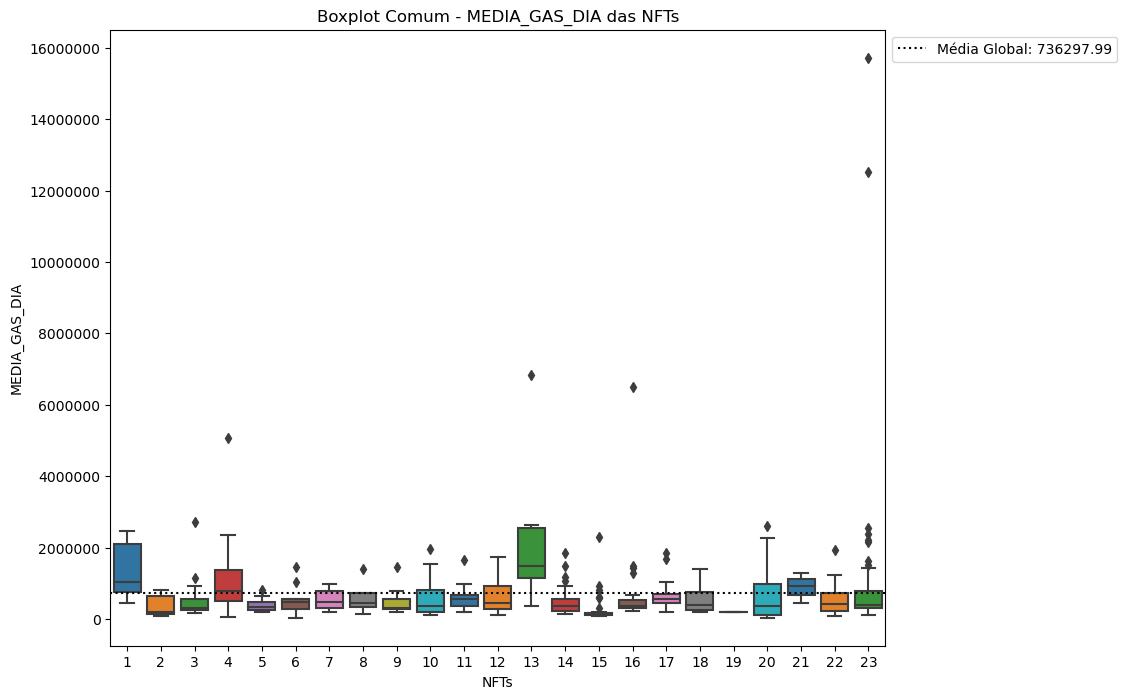

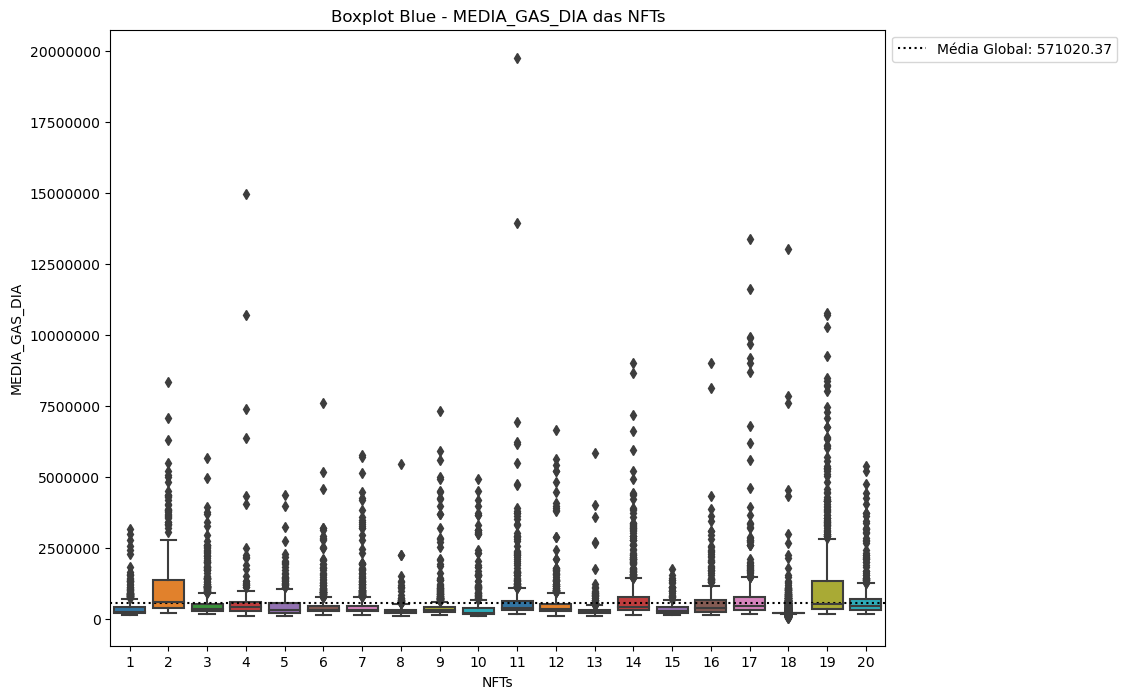

In [13]:
def plot_boxplot(ts_nft_list, title):
    # Crie um DataFrame combinado concatenando todos os DataFrames da lista
    df_combined = pd.concat(ts_nft_list, keys=range(1, len(ts_nft_list) + 1))

    # Certifique-se de que 'MEDIA_GAS_DIA' seja do tipo float64
    df_combined['MEDIA_GAS_DIA'] = df_combined['MEDIA_GAS_DIA'].astype(float)

    # Crie um boxplot para a coluna 'MEDIA_GAS_DIA' de todos os DataFrames
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=df_combined.index.get_level_values(0), y='MEDIA_GAS_DIA', data=df_combined, palette='tab10')
    plt.title(title)
    plt.xlabel("NFTs")
    plt.ylabel("MEDIA_GAS_DIA")

    # Adicione linhas para representar as médias de cada boxplot
    medians = df_combined.groupby(level=0)['MEDIA_GAS_DIA'].median()

    # Adicione uma linha para representar a média global
    global_mean = df_combined['MEDIA_GAS_DIA'].mean()
    plt.axhline(y=global_mean, color='black', linestyle='dotted', label=f'Média Global: {global_mean:.2f}')

    # Configure a escala do eixo Y para linear
    plt.yscale('linear')

    # Formate os rótulos do eixo Y como números inteiros
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

    # Adicione a legenda fora do frame
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

# Visualize a lista 1
plot_boxplot(ts_nft_comum, "Boxplot Comum - MEDIA_GAS_DIA das NFTs")

# Visualize a lista 2
plot_boxplot(ts_nft_blue, "Boxplot Blue - MEDIA_GAS_DIA das NFTs")


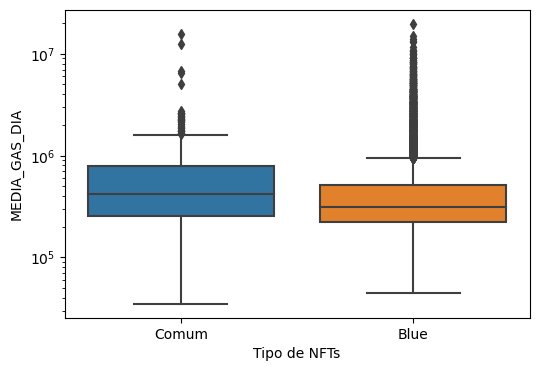

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seu código existente para combinar os DataFrames

# Combine todos os DataFrames da lista ts_nft_comum em um único DataFrame
df_combined_comum = pd.concat(ts_nft_comum, keys=['Comum']*len(ts_nft_comum))

# Combine todos os DataFrames da lista ts_nft_blue em um único DataFrame
df_combined_blue = pd.concat(ts_nft_blue, keys=['Blue']*len(ts_nft_blue))

# Combine os dois DataFrames em um único DataFrame
df_combined = pd.concat([df_combined_comum, df_combined_blue])

# Certifique-se de que 'MEDIA_GAS_DIA' seja do tipo float64
df_combined['MEDIA_GAS_DIA'] = df_combined['MEDIA_GAS_DIA'].astype(float)

# Crie um boxplot para a coluna 'MEDIA_GAS_DIA' de todos os DataFrames
# plt.figure(figsize=(10, 8))
plt.figure(figsize=(6, 4))

sns.boxplot(x=df_combined.index.get_level_values(0), y='MEDIA_GAS_DIA', data=df_combined, palette='tab10')
# plt.title("Boxplot - MEDIA_GAS_DIA de Todas as NFTs (Comuns e Blue)")
plt.xlabel("Tipo de NFTs")
plt.ylabel("MEDIA_GAS_DIA")

# Ajuste a escala do eixo y para logaritmo
plt.yscale('log')

# Adicione uma linha para representar a média global (opcional)
# global_mean = df_combined['MEDIA_GAS_DIA'].mean()
# plt.axhline(y=global_mean, color='black', linestyle='dotted', label=f'Média Global')
# plt.legend()

plt.show()


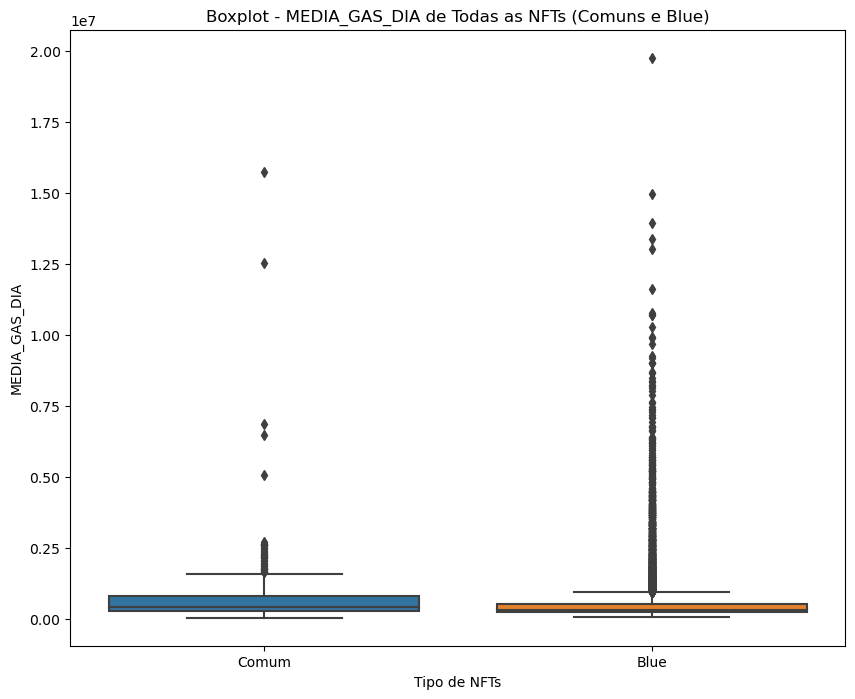

In [17]:
# Combine todos os DataFrames da lista ts_nft_comum em um único DataFrame
df_combined_comum = pd.concat(ts_nft_comum, keys=['Comum']*len(ts_nft_comum))

# Combine todos os DataFrames da lista ts_nft_blue em um único DataFrame
df_combined_blue = pd.concat(ts_nft_blue, keys=['Blue']*len(ts_nft_blue))

# Combine os dois DataFrames em um único DataFrame
df_combined = pd.concat([df_combined_comum, df_combined_blue])

# Certifique-se de que 'MEDIA_GAS_DIA' seja do tipo float64
df_combined['MEDIA_GAS_DIA'] = df_combined['MEDIA_GAS_DIA'].astype(float)

# Crie um boxplot para a coluna 'MEDIA_GAS_DIA' de todos os DataFrames
plt.figure(figsize=(10, 8))
sns.boxplot(x=df_combined.index.get_level_values(0), y='MEDIA_GAS_DIA', data=df_combined, palette='tab10')
plt.title("Boxplot - MEDIA_GAS_DIA de Todas as NFTs (Comuns e Blue)")
plt.xlabel("Tipo de NFTs")
plt.ylabel("MEDIA_GAS_DIA")

# Adicione uma linha para representar a média global ('solid', 'dashed', 'dashdot', 'dotted')
#global_mean = df_combined['MEDIA_GAS_DIA'].mean()
#plt.axhline(y=global_mean, color='black', linestyle='dotted', label=f'Média Global')

#plt.legend()
plt.show()


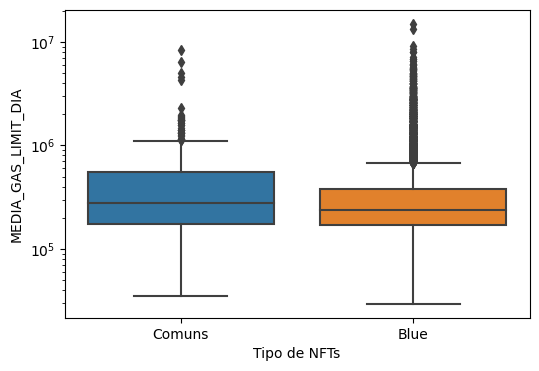

In [20]:
# Combine todos os DataFrames da lista ts_nft_comum em um único DataFrame
df_combined_comum = pd.concat(ts_nft_comum, keys=['Comuns']*len(ts_nft_comum))

# Combine todos os DataFrames da lista ts_nft_blue em um único DataFrame
df_combined_blue = pd.concat(ts_nft_blue, keys=['Blue']*len(ts_nft_blue))

# Combine os dois DataFrames em um único DataFrame
df_combined = pd.concat([df_combined_comum, df_combined_blue])

# Certifique-se de que 'MEDIA_GAS_LIMIT_DIA' seja do tipo float64
df_combined['MEDIA_GAS_LIMIT_DIA'] = df_combined['MEDIA_GAS_LIMIT_DIA'].astype(float)


# Crie um boxplot para a coluna 'MEDIA_GAS_DIA' de todos os DataFrames
# plt.figure(figsize=(10, 8))

plt.figure(figsize=(6, 4))


sns.boxplot(x=df_combined.index.get_level_values(0), y='MEDIA_GAS_LIMIT_DIA', data=df_combined, palette='tab10')
# plt.title("Boxplot - MEDIA_GAS_LIMIT_DIA (Comuns e Blue)")
plt.xlabel("Tipo de NFTs")
plt.ylabel("MEDIA_GAS_LIMIT_DIA")

# Adicione uma linha para representar a média global ('solid', 'dashed', 'dashdot', 'dotted')
global_mean = df_combined['MEDIA_GAS_LIMIT_DIA'].mean()
# plt.axhline(y=global_mean, color='black', linestyle='dotted', label=f'Média Global: {global_mean:.2f}')

# Formate os rótulos do eixo Y como números inteiros
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)


# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Ajuste a escala do eixo y para logaritmo
plt.yscale('log')

plt.show()

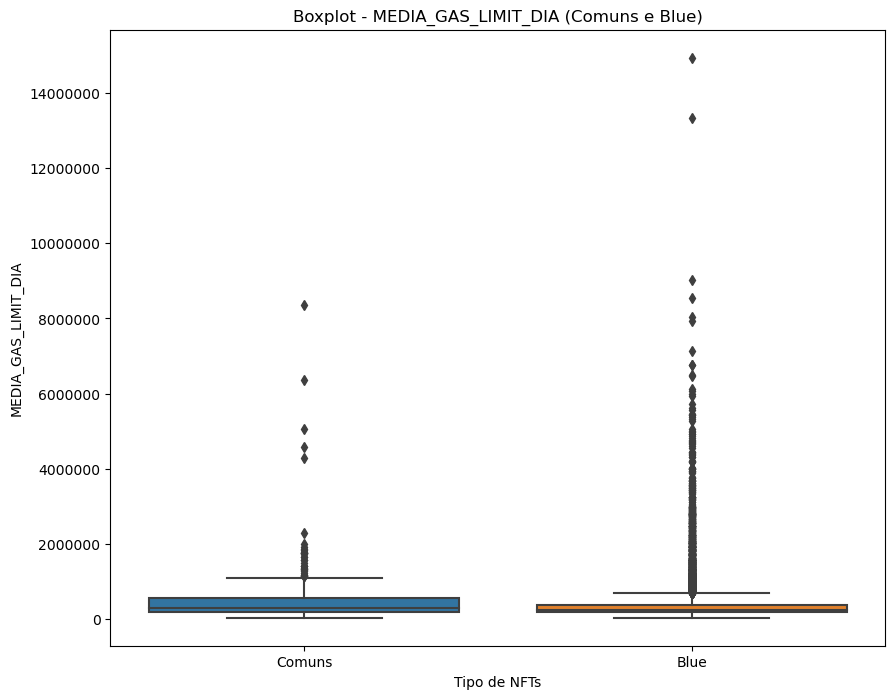

In [21]:
# Combine todos os DataFrames da lista ts_nft_comum em um único DataFrame
df_combined_comum = pd.concat(ts_nft_comum, keys=['Comuns']*len(ts_nft_comum))

# Combine todos os DataFrames da lista ts_nft_blue em um único DataFrame
df_combined_blue = pd.concat(ts_nft_blue, keys=['Blue']*len(ts_nft_blue))

# Combine os dois DataFrames em um único DataFrame
df_combined = pd.concat([df_combined_comum, df_combined_blue])

# Certifique-se de que 'MEDIA_GAS_LIMIT_DIA' seja do tipo float64
df_combined['MEDIA_GAS_LIMIT_DIA'] = df_combined['MEDIA_GAS_LIMIT_DIA'].astype(float)


# Crie um boxplot para a coluna 'MEDIA_GAS_DIA' de todos os DataFrames
plt.figure(figsize=(10, 8))
sns.boxplot(x=df_combined.index.get_level_values(0), y='MEDIA_GAS_LIMIT_DIA', data=df_combined, palette='tab10')
plt.title("Boxplot - MEDIA_GAS_LIMIT_DIA (Comuns e Blue)")
plt.xlabel("Tipo de NFTs")
plt.ylabel("MEDIA_GAS_LIMIT_DIA")

# Adicione uma linha para representar a média global ('solid', 'dashed', 'dashdot', 'dotted')
global_mean = df_combined['MEDIA_GAS_LIMIT_DIA'].mean()
# plt.axhline(y=global_mean, color='black', linestyle='dotted', label=f'Média Global: {global_mean:.2f}')

# Formate os rótulos do eixo Y como números inteiros
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)


# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


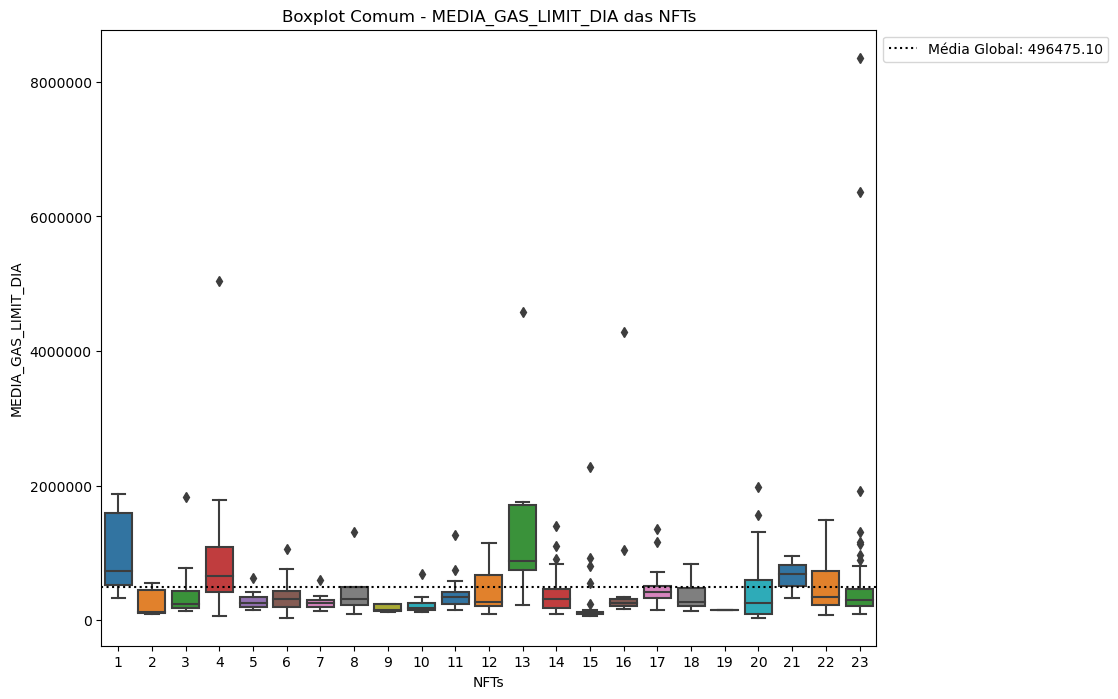

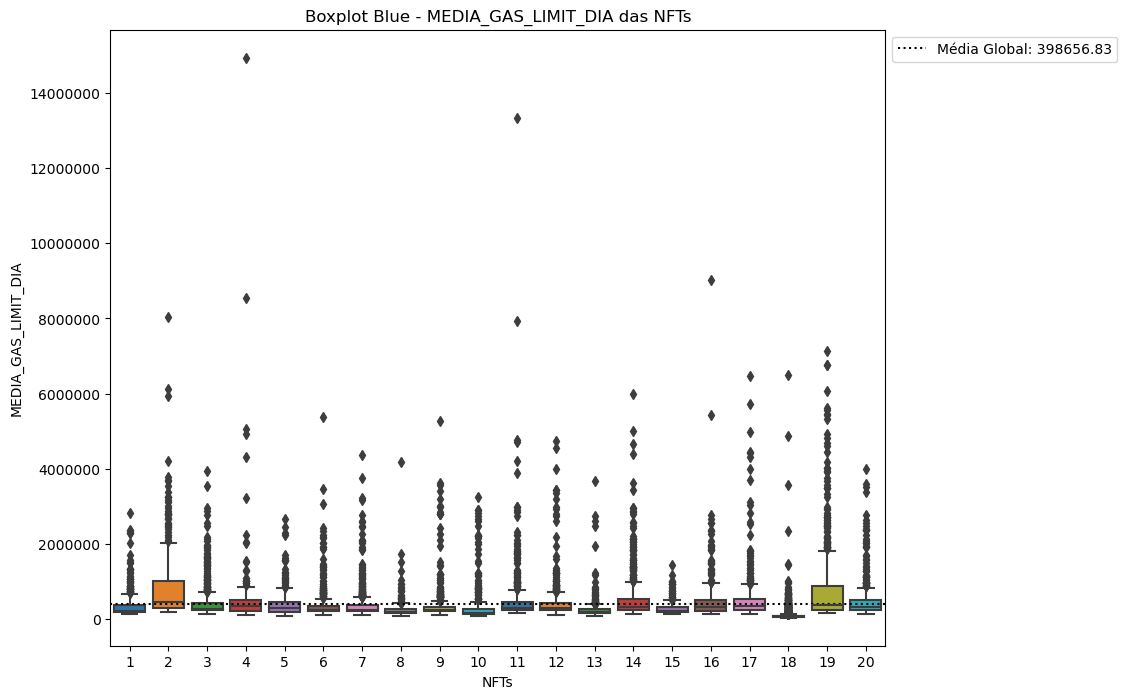

In [22]:
def plot_boxplot(ts_nft_list, title):
    # Crie um DataFrame combinado concatenando todos os DataFrames da lista
    df_combined = pd.concat(ts_nft_list, keys=range(1, len(ts_nft_list) + 1))

    # Certifique-se de que 'MEDIA_GAS_LIMIT_DIA' seja do tipo float64
    df_combined['MEDIA_GAS_LIMIT_DIA'] = df_combined['MEDIA_GAS_LIMIT_DIA'].astype(float)

    # Crie um boxplot para a coluna 'MEDIA_GAS_DIA' de todos os DataFrames
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=df_combined.index.get_level_values(0), y='MEDIA_GAS_LIMIT_DIA', data=df_combined, palette='tab10')
    plt.title(title)
    plt.xlabel("NFTs")
    plt.ylabel("MEDIA_GAS_LIMIT_DIA")

    # Adicione linhas para representar as médias de cada boxplot
    medians = df_combined.groupby(level=0)['MEDIA_GAS_LIMIT_DIA'].median()

    # Adicione uma linha para representar a média global
    global_mean = df_combined['MEDIA_GAS_LIMIT_DIA'].mean()
    plt.axhline(y=global_mean, color='black', linestyle='dotted', label=f'Média Global: {global_mean:.2f}')

    # Configure a escala do eixo Y para linear
    plt.yscale('linear')

    # Formate os rótulos do eixo Y como números inteiros
    plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
    plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)

    # Adicione a legenda fora do frame
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

# Visualize a lista 1
plot_boxplot(ts_nft_comum, "Boxplot Comum - MEDIA_GAS_LIMIT_DIA das NFTs")

# Visualize a lista 2
plot_boxplot(ts_nft_blue, "Boxplot Blue - MEDIA_GAS_LIMIT_DIA das NFTs")